# Convolutional Neural Network: fashion mnist data set

Bài viết trên [Machine Learning Cơ bản](https://machinelearningcoban.com/2018/07/06/deeplearning/) giới thiệu về keras bằng bộ số liệu với mô hình Multilayer Perceptron Neural Network (MLP)và đạt được mức độ chính xác là 88.4%. Tác giả bài viết có gợi ý rằng để nâng cao mức độ chính xác chúng ta nên sử dụng Convolutional Neural Networks (CNN) vì MLP bỏ qua thông tin về không gian ảnh (spatial information). 

Theo hướng gợi ý này tôi xây dựng một mô hình CNN đơn giản và đạt được mức độ chính xác 93% như sau: 

In [1]:
# Load bộ dữ liệu: 

from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
# Chuẩn bị một số thư viện cho hình ảnh hóa số liệu: 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

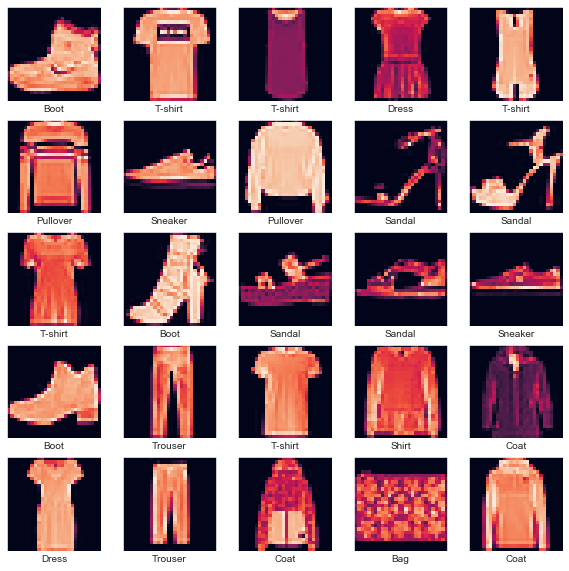

In [3]:
# Một số "quan sát" về bộ dữ liệu: 

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

In [4]:
# Chuẩn bị dữ liệu: 
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images / 255, test_images  / 255

In [5]:
# Thiết lập Convolutional Neural Networks (CNN): 

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

W0903 09:30:57.292305  9372 deprecation.py:506] From C:\Users\Zbook\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Huấn luyện CNN trên con máy HP ZBook 15 Workstation có hỗ trợ tính toán bằng GPU với NVIDIA Quadro K1100 M (con Card này giờ hơi lỗi thời chỉ có 384 nhân CUDA, Bus chỉ 128 với 2 Gi RAM) thì thời gian huấn luyện là khoảng 870s: 

In [6]:
# Huấn luyện CNN và tính thời gian huấn luyện: 

import time
start_time = time.time()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, verbose=0, validation_split=0.1)

print('Training Time:', time.time() - start_time)

Training Time: 871.953191280365


In [8]:
# Accuracy trên Train Data: 
print('Train Accuracy:', model.evaluate(test_images, test_labels, verbose=0))

Train Accuracy: [0.2702552646815777, 0.9253]


Khảo sát Accuracy theo epoch chúng ta có thể kì vọng rằng mức độ chính xác trên train data có thể dao động nhưng sẽ quanh ngưỡng từ 92% - 93%:  

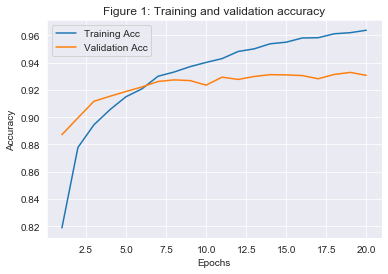

In [9]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, 20 + 1)
plt.plot(epochs, acc_values, label='Training Acc')
plt.plot(epochs, val_acc_values, label='Validation Acc')
plt.title('Figure 1: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vài kết luận

- Với kết quả ở trên chỉ ra rằng chúng ta có bằng chứng cho thấy CNN hiệu quả hơn so với MLP. 
- Những kĩ thuật tinh chỉnh mô hình và giảm thời gian huấn luyện cho CNN chưa được đề cập. 

# Tham khảo

1. https://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/
2. https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
3. https://machinelearningcoban.com/2018/07/06/deeplearning/